In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 98% 418M/428M [00:03<00:00, 178MB/s]
100% 428M/428M [00:03<00:00, 142MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/toronto-emotional-speech-set-tess.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!pip install librosa

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import librosa
import IPython.display as ipd

In [ ]:
train_folder=os.listdir('/content/TESS Toronto emotional speech set data')
print(train_folder)
print(len(train_folder))

['OAF_disgust', 'OAF_neutral', 'YAF_pleasant_surprised', 'OAF_Fear', 'OAF_angry', 'OAF_Sad', 'YAF_neutral', 'OAF_Pleasant_surprise', 'YAF_happy', 'YAF_fear', 'YAF_angry', 'YAF_sad', 'OAF_happy', 'YAF_disgust']
14


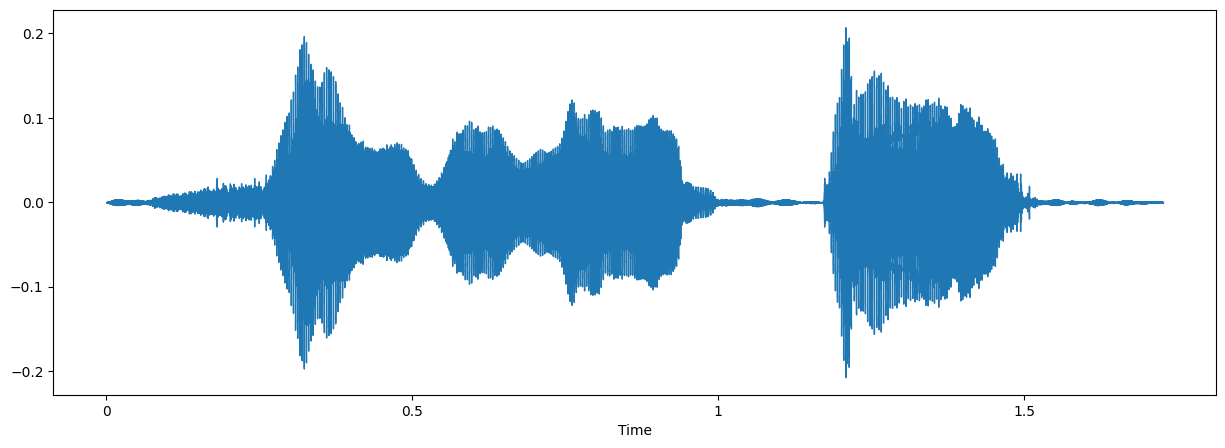

In [ ]:
plt.figure(figsize=(15,5))
audio_path='/content/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav'
audio,sample_rate=librosa.load(audio_path)
librosa.display.waveshow(audio,sr=sample_rate)
ipd.Audio(audio_path)

In [ ]:
new_data=[]

In [ ]:
for i in range(14):
  folder_path='/content/TESS Toronto emotional speech set data/'+train_folder[i]
  audio_folder=os.listdir(folder_path)
  l=len(audio_folder)
  for j in range(l):
    audio_path=folder_path+'/'+audio_folder[j]
    audio,sample_rate=librosa.load(audio_path)
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=50)
    mfcc_scaled_features=np.mean(mfccs_features.T,axis=0)
    new_data.append([mfcc_scaled_features,i])

In [ ]:
x=[]
y=[]
for audio,label in new_data:
  x.append(audio)
  y.append(label)

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2520, 50) (280, 50) (2520,) (280,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv1D(32,kernel_size=3,activation="relu",input_shape=(50,1)),
    keras.layers.MaxPool1D(2),
    keras.layers.Conv1D(64,kernel_size=3,activation="relu"),
    keras.layers.MaxPool1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(15,activation="softmax"),
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
71/71 [==============================] - 2s 9ms/step - loss: 2.6718 - accuracy: 0.5904 - val_loss: 0.1262 - val_accuracy: 0.9881
Epoch 2/10
71/71 [==============================] - 0s 6ms/step - loss: 0.2165 - accuracy: 0.9286 - val_loss: 0.0320 - val_accuracy: 0.9921
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.1239 - accuracy: 0.9603 - val_loss: 0.0304 - val_accuracy: 0.9921
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.9766 - val_loss: 0.0227 - val_accuracy: 0.9921
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.0712 - accuracy: 0.9762 - val_loss: 0.0111 - val_accuracy: 0.9960
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9802 - val_loss: 0.0153 - val_accuracy: 0.9960
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9846 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 8/10
71/71 [==

In [ ]:
audio_path='/content/TESS Toronto emotional speech set data/OAF_neutral/OAF_back_neutral.wav'
audio,sample_rate=librosa.load(audio_path)
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=50)
mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
mfccs_reshape=mfccs_scaled_features.reshape(1,-1)
prediction=model.predict(mfccs_reshape)
print(prediction)
output=np.argmax(prediction)
print(output)
if(output==0):
  print('The Sound is ANGRY')
elif(output==1):
  print('The Sound is NEUTRAL')
elif(output==2):
  print('The Sound is PLEASANT SURPRISE')
elif(output==3):
  print('The Sound is FEAR')
elif(output==4):
  print('The Sound is ANGRY')
elif(output==5):
  print('The Sound is SAD')
elif(output==6):
  print('The Sound is NEUTRAL')
elif(output==7):
  print('The Sound is PLEASANT SURPRISE')
elif(output==8):
  print('The Sound is HAPPY')
elif(output==9):
  print('The Sound is FEAR')
elif(output==10):
  print('The Sound is ANGRY')
elif(output==11):
  print('The Sound is SAD')
elif(output==12):
  print('The Sound is HAPPY')
elif(output==13):
  print('The Sound is DISGUIST')

1/1 [==============================] - 0s 24ms/step
[[1.5936684e-09 9.9999964e-01 8.6182141e-13 1.6567456e-16 3.8257339e-16
  3.2615833e-07 4.5559627e-08 4.6507260e-11 2.0656186e-14 6.0473578e-11
  1.9372361e-15 3.3194217e-15 9.5949588e-15 2.2334300e-12 1.6506330e-16]]
1
The Sound is NEUTRAL


In [ ]:
tf.keras.models.save_model(model,'emotion.hdf5')

<ipython-input-55-6b5a212db9ab>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'emotion.hdf5')
